# 패키지 import

In [1]:
import os
import win32com.client as win32
from pathlib import Path
import pandas as pd
import numpy as np
import time
from pptx import Presentation
import re

from tqdm import trange
from time import sleep
from tqdm import tqdm

from eunjeon import Mecab
tagger = Mecab(dicpath="C:\\mecab\\mecab-ko-dic")

from konlpy.tag import Kkma, Komoran, Okt
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis.gensim_models

from wordcloud import WordCloud
from collections import Counter
import ipywidgets as widgets
import qgrid


import warnings
warnings.filterwarnings(action='ignore')

import matplotlib as mpl
import matplotlib.pyplot as plt
import squarify
plt.style.use('seaborn-white')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='NanumGothic')

C:\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
C:\Anaconda3\lib\site-packages\ipywidgets\widgets\widget.py:282: DeprecationWarning: Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.
  warnings.warn("Widget registration using a string name has been deprecated. Widget registration now uses a plain `@register` decorator.", DeprecationWarning)
C:\Anaconda3\lib\site-packages\qgrid\grid.py:573: DeprecationWarning: metadata {'sync': True} was set from the constructor. With traitlets 4.1, metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  _df_json = Unicode('', sync=True)


# 연관성 분석
  - 신규 및 복귀 유저 데이터 각 1번씩 진행

In [2]:
back_user = pd.read_csv('D:/project/2022/주원포폴/001네오플/네오플/4. 데이터 가공/복귀/복귀유저데이터.csv')
back_user

,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용
0,Gun천수,2022-04-20 21:24,93,0,https://cafe.naver.com/dfither/21567108,그 사이에 디렉터도 바뀌고 게임 좋아진거같은데 그 사이에 있던 패치나 내용같은거잘 ...,던파 예전 그 사건 이후로 접고 1년만에 복귀한 복귀자인데 질문있습니다.,던파 예전 그 사건 이후로 접고 1년만에 복귀한 복귀자인데 질문있습니다.그 사이에 ...
1,큐켄,2022-04-20 9:18,96,0,https://cafe.naver.com/dfither/21567037,유튜브 파밍 공략들 보면 전부 노블코드 노말에서 컨셉 세팅 완성하고 옵션레벨 성장 ...,복귀 나부랭탱이 질문점,복귀 나부랭탱이 질문점유튜브 파밍 공략들 보면 전부 노블코드 노말에서 컨셉 세팅 완...
2,큐켄,2022-04-18 16:58,48,0,https://cafe.naver.com/dfither/21566944,8종 인던 암대나 잡아서 익스 뺑이 치는 중인데 무리해서라도 마스터로 뺑이 치는게 ...,복귀유저 질문점,복귀유저 질문점8종 인던 암대나 잡아서 익스 뺑이 치는 중인데 무리해서라도 마스터로...
3,쇼쉼,2022-04-18 9:15,148,0,https://cafe.naver.com/dfither/21566910,본케는 수라라서이번 12강 무기 주면서 같이 키울까합니다,오랜만에 복귀했는데 이중에 부케 추천좀 해주실분,오랜만에 복귀했는데 이중에 부케 추천좀 해주실분본케는 수라라서이번 12강 무기 주면...
4,신선호,2022-04-17 23:23,33,0,https://cafe.naver.com/dfither/21566893,복귀해서 1시간만에 100찍고 무기 받았는데15년만이라 뭘해야할지 모르겠네 뭐하는거임?,근데있잖아,근데있잖아복귀해서 1시간만에 100찍고 무기 받았는데15년만이라 뭘해야할지 모르겠네...
...,...,...,...,...,...,...,...,...
11126,ㅇㅇ (221.159),2020-09-17 6:51,113,0,https://arca.live/b/dunfa/7881464?target=all&k...,보상이 짜네마네가 아니라 운영진이 대놓고 횡령하고 유저 개무시하는 발언까지 서슴없이...,근데 보상이 저렇게 들어와도 복귀하고 싶은 마음이 하나도 안듬,근데 보상이 저렇게 들어와도 복귀하고 싶은 마음이 하나도 안듬보상이 짜네마네가 아니...
11127,콘코네,2020-09-07 3:47,238,0,https://arca.live/b/dunfa/6966336?target=all&k...,아수라로 메갈풀셋만들고 접은게 마지막인데 지금 복귀하면 좆망임?,요즘 재밌음?,요즘 재밌음?아수라로 메갈풀셋만들고 접은게 마지막인데 지금 복귀하면 좆망임?
11128,caldo (58.29),2020-09-03 3:57,2480,0,https://arca.live/b/dunfa/6796500?target=all&k...,18년도에 다시복귀했을 때 젤 맘에들었던게 정가시스템임반응석 사가며 헬돌으니까 6캐...,난 정가제 시절이 더 좋았거 같음,난 정가제 시절이 더 좋았거 같음18년도에 다시복귀했을 때 젤 맘에들었던게 정가시스...
11129,음란여우,2020-09-03 2:22,823,0,https://arca.live/b/dunfa/6795107?target=all&k...,진짜 막말로 이번 숙제 70개만 해도 숙제 갯수가 70개라는거부터 숨이 턱 막히지만...,지금 뉴비들이 파 꼬접하는 가장 큰 이유,지금 뉴비들이 파 꼬접하는 가장 큰 이유진짜 막말로 이번 숙제 70개만 해도 숙제 ...


In [ ]:
new_user = pd.read_csv('D:/project/2022/주원포폴/001네오플/네오플/4. 데이터 가공/신규/신규유저데이터.csv')
new_user

## 사용 클래스 (Kkma, Komoran, Okt) 선정
 - Kkma, Komoran, Okt 중 사용할 클래스 선정
 - 선정 결과 okt 사용

In [ ]:
Kkma = Kkma()
Komoran=Komoran()
Okt=Okt()
kk = Kkma.nouns(back_user['제목+내용'][1])
ko = Komoran.nouns(back_user['제목+내용'][1])
okt = Okt.nouns(back_user['제목+내용'][1])
print(back_user['제목+내용'][1])
print('Kkma')
print(kk)
print('Komoran')
print(ko)
print('okt')
print(okt)

##  형태소 분석을 이용한 명사 추출

In [3]:
nouns = []
cnt = 0
for txt in tqdm(back_user['제목+내용']) :
    for noun in tagger.nouns(txt) :
        nouns.append(noun)
        
nouns[:10]

100%|██████████████████████████████████████████████████████████████████████████| 11131/11131 [00:01<00:00, 6291.41it/s]


['파', '예전', '사건', '이후', '년', '만', '복귀', '복귀', '질문', '사이']

## 불용어(Stopwords) 사전 만들기

In [5]:
stop_words = ['이것', '이거', '복귀', '안녕', '질문', '가요', '유저', '고민중', '고민', '하나', '정도', '겜','게임',
             '던파','던전앤파이터','캐릭','어디','네오플','다음','안톤','바칼','카인','카시야스','디레지에','힐더',
              '프레이','시로코','이번','린이','뉴비','옛날','신규','때문','생각','가능'] 

## 명사 추출 함수 만들기
  - 1글자 이상의 명사만 추출
  - 불용어 제거 처리

In [ ]:
def get_nouns(x):
    nouns_tagger = Okt()
    nouns = nouns_tagger.nouns(x)
    # 한글자 키워드를 제거합니다.
    nouns = [noun for noun in nouns if len(noun) > 1]
    # 불용어를 제거합니다.
    nouns = [noun for noun in nouns if noun not in stop_words]
    return nouns

## 텍스트 클리닝

In [7]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') 
    result = hangul.sub('', text)
    return result

back_user['수정_제목+내용'] = back_user['제목+내용'].apply(lambda x : text_cleaning(x))
back_user.head()

,글쓴이,등록일,조회,추천,주소,내용,제목수정,제목+내용,수정_제목+내용
0,Gun천수,2022-04-20 21:24,93,0,https://cafe.naver.com/dfither/21567108,그 사이에 디렉터도 바뀌고 게임 좋아진거같은데 그 사이에 있던 패치나 내용같은거잘 ...,던파 예전 그 사건 이후로 접고 1년만에 복귀한 복귀자인데 질문있습니다.,던파 예전 그 사건 이후로 접고 1년만에 복귀한 복귀자인데 질문있습니다.그 사이에 ...,던파 예전 그 사건 이후로 접고 년만에 복귀한 복귀자인데 질문있습니다그 사이에 디렉...
1,큐켄,2022-04-20 9:18,96,0,https://cafe.naver.com/dfither/21567037,유튜브 파밍 공략들 보면 전부 노블코드 노말에서 컨셉 세팅 완성하고 옵션레벨 성장 ...,복귀 나부랭탱이 질문점,복귀 나부랭탱이 질문점유튜브 파밍 공략들 보면 전부 노블코드 노말에서 컨셉 세팅 완...,복귀 나부랭탱이 질문점유튜브 파밍 공략들 보면 전부 노블코드 노말에서 컨셉 세팅 완...
2,큐켄,2022-04-18 16:58,48,0,https://cafe.naver.com/dfither/21566944,8종 인던 암대나 잡아서 익스 뺑이 치는 중인데 무리해서라도 마스터로 뺑이 치는게 ...,복귀유저 질문점,복귀유저 질문점8종 인던 암대나 잡아서 익스 뺑이 치는 중인데 무리해서라도 마스터로...,복귀유저 질문점종 인던 암대나 잡아서 익스 뺑이 치는 중인데 무리해서라도 마스터로 ...
3,쇼쉼,2022-04-18 9:15,148,0,https://cafe.naver.com/dfither/21566910,본케는 수라라서이번 12강 무기 주면서 같이 키울까합니다,오랜만에 복귀했는데 이중에 부케 추천좀 해주실분,오랜만에 복귀했는데 이중에 부케 추천좀 해주실분본케는 수라라서이번 12강 무기 주면...,오랜만에 복귀했는데 이중에 부케 추천좀 해주실분본케는 수라라서이번 강 무기 주면서 ...
4,신선호,2022-04-17 23:23,33,0,https://cafe.naver.com/dfither/21566893,복귀해서 1시간만에 100찍고 무기 받았는데15년만이라 뭘해야할지 모르겠네 뭐하는거임?,근데있잖아,근데있잖아복귀해서 1시간만에 100찍고 무기 받았는데15년만이라 뭘해야할지 모르겠네...,근데있잖아복귀해서 시간만에 찍고 무기 받았는데년만이라 뭘해야할지 모르겠네 뭐하는거임


In [ ]:
new_user['수정_제목+내용'] = new_user['제목+내용'].apply(lambda x : text_cleaning(x))
new_user.head()

## 형태소 분석 수행

In [ ]:
back_user['nouns'] = back_user['수정_제목+내용'].apply(lambda x: get_nouns(x))
print(back_user.shape)
back_user.head()

In [ ]:
new_user['nouns'] = new_user['수정_제목+내용'].apply(lambda x: get_nouns(x))
print(new_user.shape)
new_user.head()

## 함수 정의
  - count_words : 단어 빈도수를 세어 상위 50개의 단어를 리턴해주는 함수
  - displayWordCloud : 워드 클라우드 생성 함수(배경지정)
  - displayWordCloud_d : 워드 클라우드 생성 함수(색상 지정)
  - 워드 클라우드의 색상은 Wistia 사용

In [9]:
def count_words(text):
    nouns = []
    for txt in text:
        for noun in tagger.nouns(txt):
            if len(noun) == 1:
                continue
            if noun not in stop_words:
                nouns.append(noun)

    nouns_counter = Counter(nouns)
    top_nouns = dict(nouns_counter.most_common(50))
    print("> 상위 50위 키워드 분석결과입니다!")
    print("--"*60)
    print(top_nouns)
    return top_nouns

def displayWordCloud(data=None, backgroundcolor='white', width=1280, height=768):
    wordcloud = WordCloud(
        font_path='08SeoulNamsanEB.ttf',
        background_color=backgroundcolor,
        width=width,
        height=height).generate_from_frequencies(data)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
    
def displayWordCloud_d(data, colormap,  width=1280, height=768):
    wordcloud = WordCloud(
        font_path='08SeoulNamsanEB.ttf',
        background_color='white',
        colormap = colormap,
        width=width,
        height=height
        ).generate_from_frequencies(data)
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

## 단어 빈도수 측정

In [10]:
top_nouns =count_words(back_user['수정_제목+내용'])

> 상위 50위 키워드 분석결과입니다!
------------------------------------------------------------------------------------------------------------------------
{'신화': 2302, '파밍': 1269, '레이드': 1234, '사람': 1227, '무기': 1158, '에픽': 1154, '장비': 1130, '이벤트': 1116, '던전': 1019, '오즈마': 973, '패스': 901, '강화': 834, '칭호': 827, '시작': 810, '직업': 754, '버퍼': 738, '연옥': 666, '스킬': 662, '시간': 657, '레벨': 629, '증폭': 618, '추천': 585, '세팅': 581, '블레이드': 566, '부캐': 554, '시즌': 542, '본캐': 524, '졸업': 522, '캐릭터': 518, '개조': 515, '컨텐츠': 512, '파티': 491, '만렙': 472, '친구': 471, '추가': 468, '옵션': 467, '선택': 464, '시너지': 463, '가이드': 454, '스펙': 452, '마부': 446, '스위칭': 445, '로얄': 442, '루크': 430, '골드': 420, '산물': 416, '크리': 414, '클레': 412, '계승': 409, '지금': 409}


In [ ]:
top_nouns_new =count_words(new_user['수정_제목+내용'])

> 상위 50위 키워드 분석결과입니다!
------------------------------------------------------------------------------------------------------------------------
{'신화': 2123, '사람': 1607, '장비': 1520, '무기': 1491, '레이드': 1475, '파밍': 1397, '에픽': 1332, '던전': 1304, '이벤트': 1285, '스킬': 1270, '시작': 1186, '오즈마': 1139, '칭호': 1129, '버퍼': 1129, '패스': 1123, '직업': 1098, '강화': 1049, '추천': 976, '연옥': 922, '레벨': 915, '부캐': 896, '세팅': 828, '시간': 808, '마부': 803, '가이드': 758, '시즌': 742, '증폭': 732, '옵션': 713, '패키지': 705, '캐릭터': 697, '골드': 691, '명성': 685, '컨텐츠': 682, '파티': 682, '선택': 672, '본캐': 615, '패턴': 595, '크리': 577, '아바타': 572, '필요': 569, '블레이드': 568, '스펙': 563, '여기': 553, '이상': 550, '세트': 544, '보상': 531, '비들': 525, '스위칭': 519, '로얄': 507, '개조': 506}

## 단어 빈도 시각화

In [ ]:
y_pos = np.arange(len(top_nouns_new))
plt.figure(figsize = (12,12))
plt.barh(y_pos, top_nouns_new.values(),color='C2')
plt.title('Word Count')
plt.yticks(y_pos, top_nouns_new.keys())
plt.show()

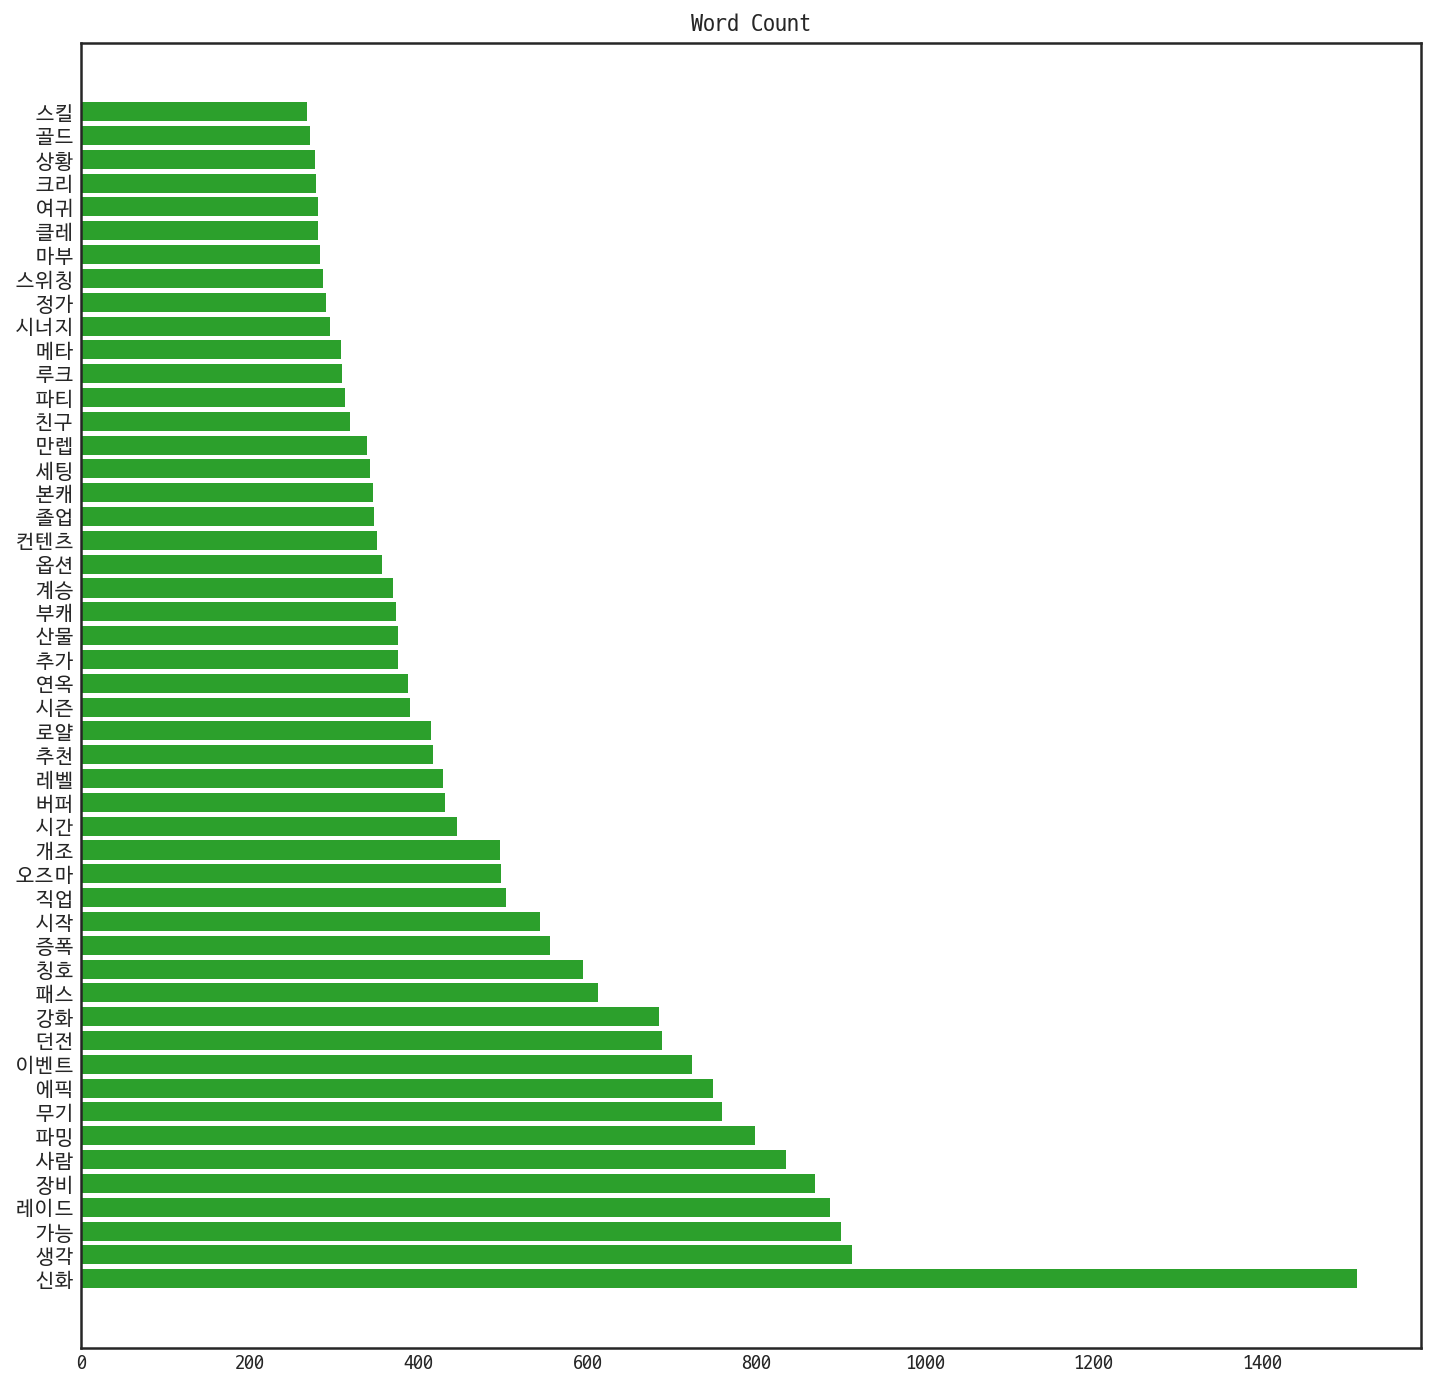

In [36]:
y_pos = np.arange(len(top_nouns))
plt.figure(figsize = (12,12))
plt.barh(y_pos, top_nouns.values(),color='C2')
plt.title('Word Count')
plt.yticks(y_pos, top_nouns.keys())
plt.show()

## squarify 트리맵 시각화

In [ ]:
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))

colors = [mpl.cm.Wistia(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=0.7)

<AxesSubplot:>

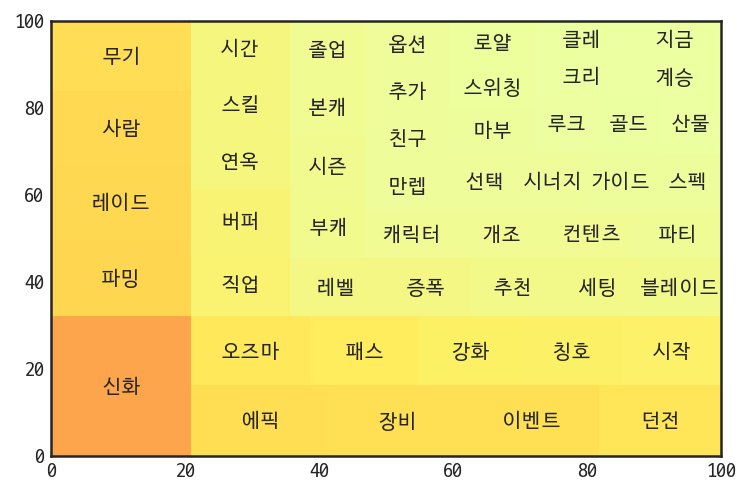

In [17]:
norm = mpl.colors.Normalize(vmin=min(top_nouns.values()),
                            vmax=max(top_nouns.values()))

colors = [mpl.cm.Wistia(norm(value)) for value in top_nouns.values()]

squarify.plot(label=top_nouns.keys(),
              sizes=top_nouns.values(),
              color=colors,
              alpha=0.7)

## 워드클라우드

In [ ]:
displayWordCloud(top_nouns_new)

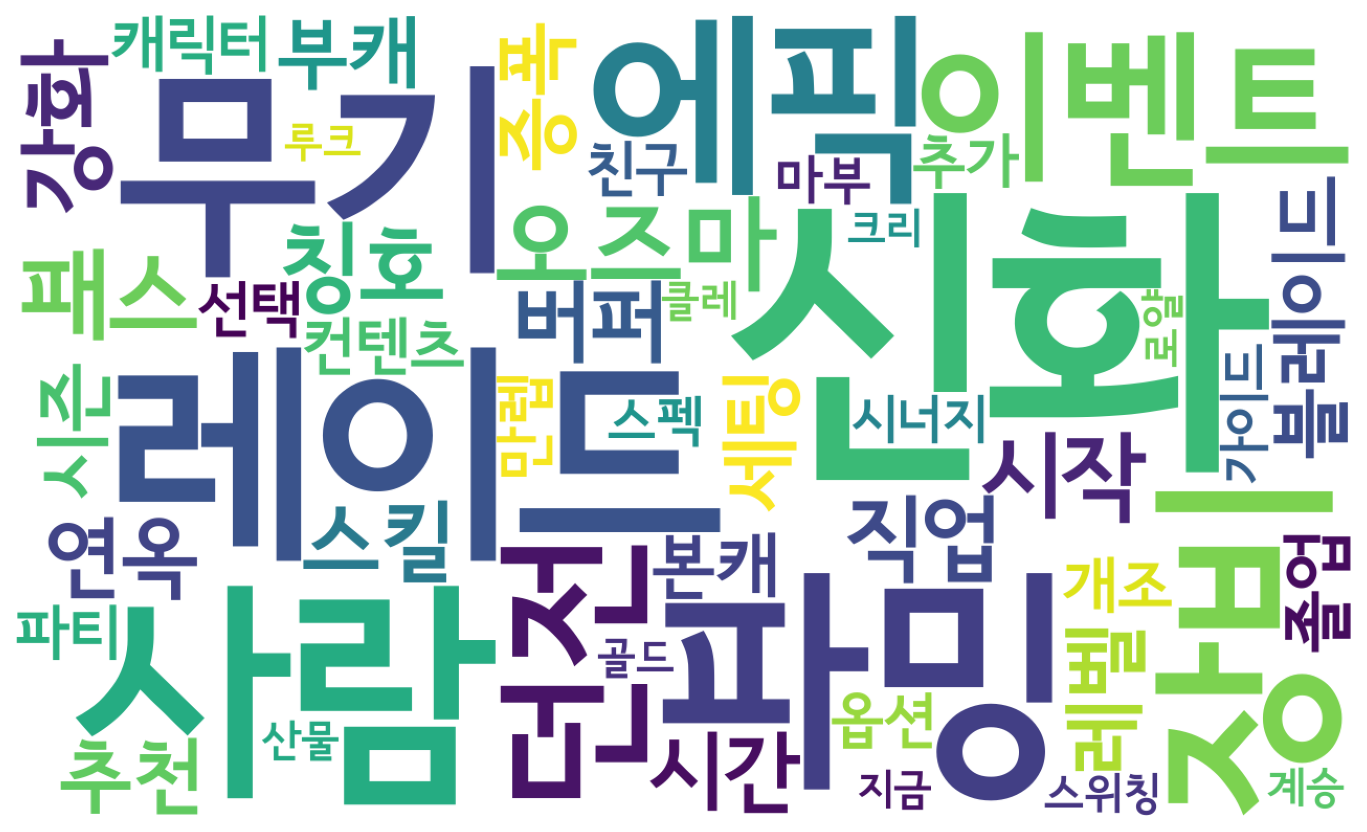

In [11]:
displayWordCloud(top_nouns)

In [ ]:
displayWordCloud_d(top_nouns_new,'Wistia')

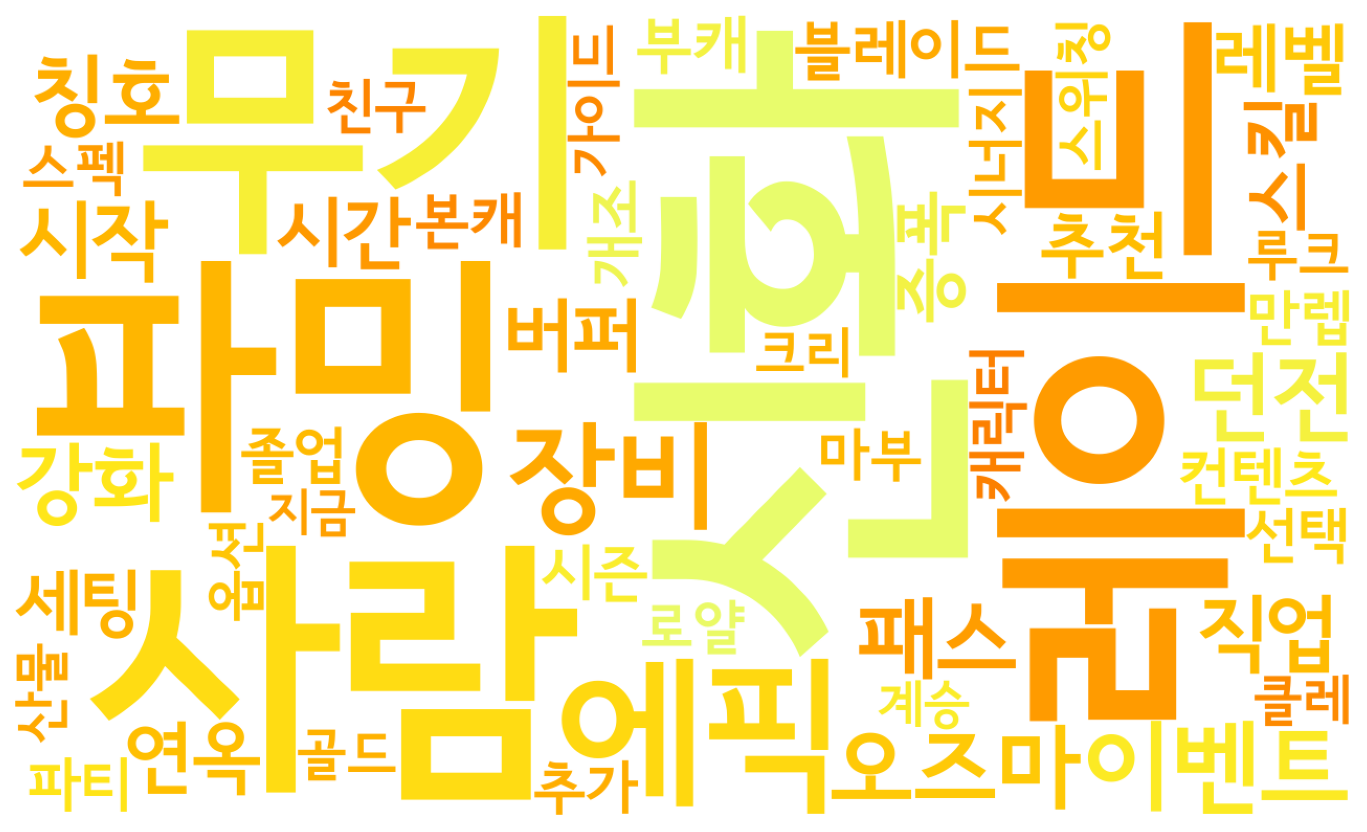

In [18]:
displayWordCloud_d(top_nouns,'Wistia')